In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Stores.csv")

In [104]:
df.head()
#Store Sales in $

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [5]:
df.corr()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000


In [6]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [26]:
df.isnull()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
891,False,False,False,False,False
892,False,False,False,False,False
893,False,False,False,False,False
894,False,False,False,False,False


In [27]:
all_columns = df.columns
print(all_columns)

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')


In [11]:
for col in all_columns:
    print(col, df[col].skew())

Store ID  0.0
Store_Area 0.030366862979232103
Items_Available 0.03443939172681748
Daily_Customer_Count 0.07463278790524851
Store_Sales 0.14879364291055253


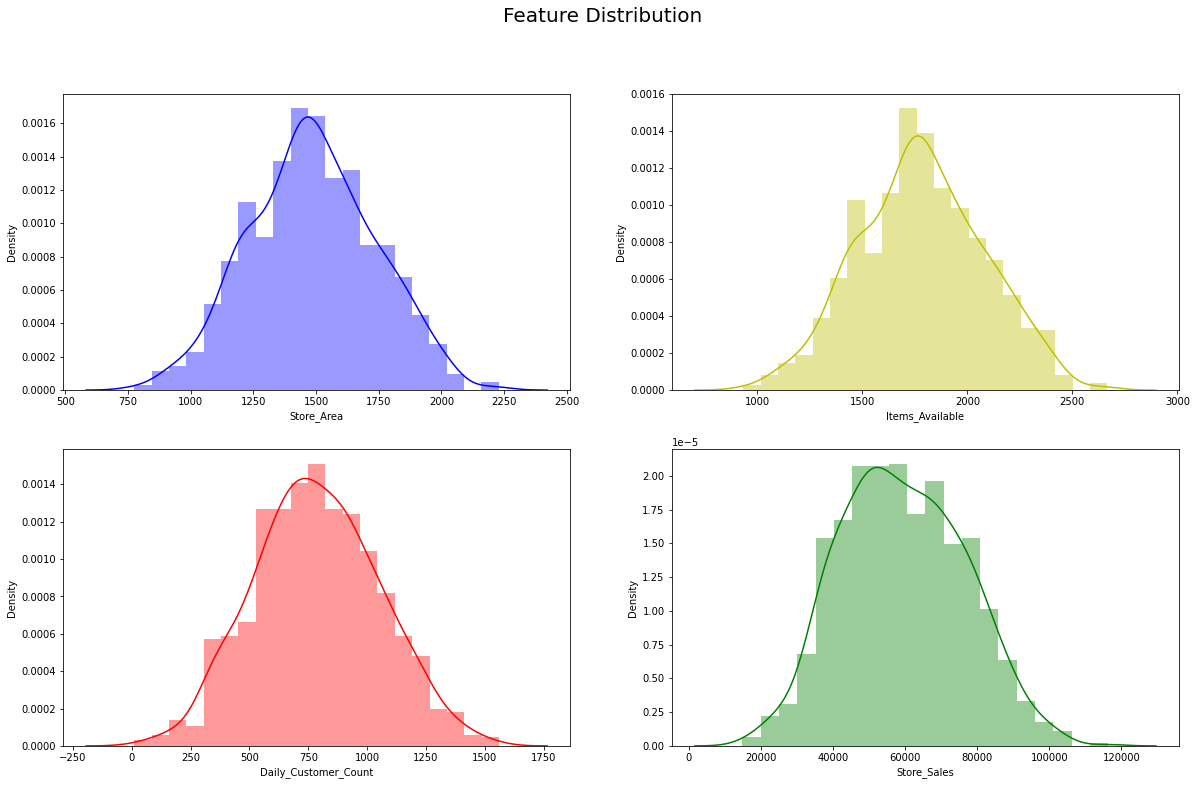

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.distplot(df.Store_Area,color='b')
plt.subplot(2,2,2)
sns.distplot(df.Items_Available,color='y')
plt.subplot(2,2,3)
sns.distplot(df.Daily_Customer_Count,color='r')
plt.subplot(2,2,4)
sns.distplot(df.Store_Sales,color='g')
plt.suptitle('Feature Distribution',fontsize=20)
plt.show()

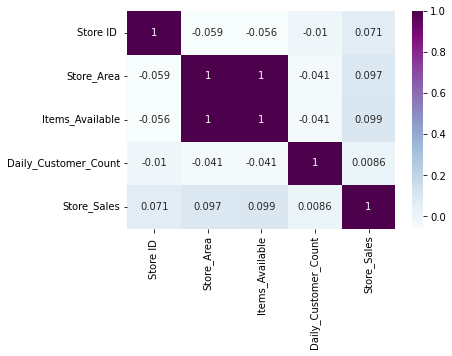

In [23]:

sns.heatmap(df.corr(),annot=True,cmap = 'BuPu')
plt.show()

FRom the above heatmap we see that Store Area and Items Available have positive linear relationship. If one goes higher the other increases proportionally. Store Area value is determined by Total of Items Available value.

In [ ]:
#from matplotlib import colormaps
#list(colormaps)

In [32]:
!pip install statsmodels

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 12.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 14.4 MB/s eta 0:00:00
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme wi

In [34]:
px.scatter(df,x='Items_Available',y='Store_Area',template='plotly_dark',color_discrete_sequence=['blue'],trendline='ols',title='Items_Available Vs Store_Area')

Preparing Training Data

In [35]:
X = df.drop('Store_Sales',axis=1)
Y = df.Store_Sales

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

Data Normalization using Minmaxscaler rather than Standard scaler because Minmaxscaler preserves the  original distribution's shape and range whereas Standard scaler removes mean and scaling to unit variance.

In [63]:
columns = ['Store_Area', 'Items_Available', 'Daily_Customer_Count']
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train[columns]=mmscaler.fit_transform(x_train[columns])
x_test[columns]=mmscaler.fit_transform(x_test[columns])
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pred=model.predict(x_test)


In [66]:
print(y_pred[:10])

[63005.23300123 59161.51037426 57136.70710576 59606.88065875
 61479.59773948 61747.00419895 62460.7505102  58425.14591458
 58336.75604475 60085.11512326]


Evaluate Performance of the Model

In [69]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 269981080.9683128


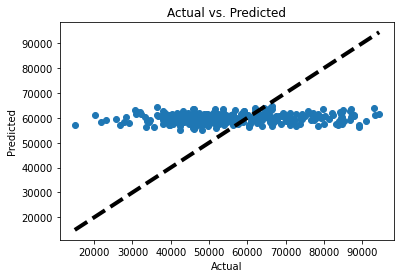

In [103]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()
#Note: Ideally, these points should lie close to a diagonal line with slope 1.

In [73]:
#pd.qcut(Y, q=4, precision=0)

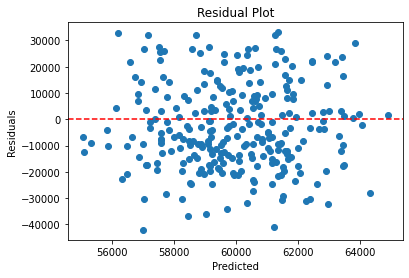

In [78]:
# Visualize the performance

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

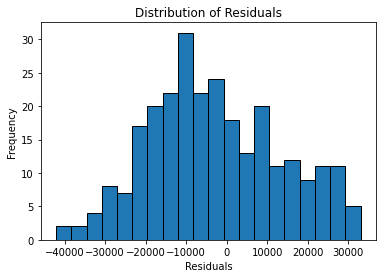

In [79]:
# Distributions of residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

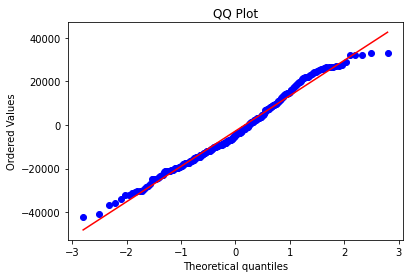

In [81]:
# QQ plot
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

# Note: If the residuals are normally distributed, the points in the QQ plot
# will fall approximately along a straight line.

In [82]:
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4))

Mean Absolute Error (MAE): 13692.4618
Mean Squared Error (MSE): 269981080.9683
Root Mean Squared Error (RMSE): 16431.101


Create a dataframe to compare true and predicted store sales values

In [84]:
predicted_values_df = pd.DataFrame({'Store_Sales_Actual':y_test, 'Store_Sales_Predicted':y_pred})

In [85]:
final_df = df.merge(predicted_values_df, left_index=True, right_index=True)

In [87]:
final_df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Sales_Actual,Store_Sales_Predicted
0,1,1659,1961,530,66490,66490,56847.240383
3,4,1451,1748,620,53730,53730,57859.679738
8,9,1090,1321,680,46310,46310,56510.519671
10,11,1187,1439,1090,71280,71280,56952.341248
12,13,1746,2064,1050,60470,60470,57101.612709


In [89]:
final_df.sample(15)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Sales_Actual,Store_Sales_Predicted
660,661,1667,2020,980,66070,66070,63005.233001
768,769,1116,1347,700,74080,74080,60425.547888
508,509,1496,1787,800,58070,58070,59915.011205
674,675,1427,1677,210,54590,54590,59158.178678
541,542,1633,1936,1320,46050,46050,59752.544599
23,24,1449,1752,620,50680,50680,58307.347836
373,374,1909,2306,820,31940,31940,62405.647009
384,385,1554,1852,440,48120,48120,59369.404593
891,892,1582,1910,1080,66390,66390,63381.636311
458,459,1332,1610,880,38890,38890,59934.675366


Explore the relationship between two variables simultaneously, making it useful for visualizing bivariate distributions.

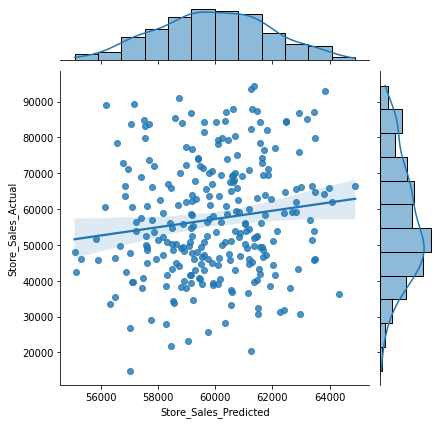

In [101]:
sns.jointplot(x="Store_Sales_Predicted", y="Store_Sales_Actual", data=predicted_values_df, kind="reg")